<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/doris/dss_project_children_under_age_6_with_no_parent_in_the_labor_force_in_idaho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Children under age 6 with no parent in the labor force in Idaho

In [2]:
# imports

import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
from google.colab import files
import io

# # Adapted from: https://stackoverflow.com/questions/1051254/check-if-python-package-is-installed
# def chk_installed(package_name):
#     installed_packages = !pip list
#     for package in installed_packages:
#       if 'bokeh' in package:
#         print(package)
#     if package_name not in installed_packages:
#         print("{} not found, installing now".format(package_name))
#         !pip install bokeh --upgrade

# chk_installed('bokeh')
# import bokeh.io as bk
# from bokeh.palettes import magma
# from bokeh.models import Button, CheckboxGroup, RadioGroup, CustomJS, Slider

In [3]:
# @title View Idaho Data Sample

# Upload csv files
#uploaded = files.upload()
# store data in pd dataframe
idaho = pd.read_csv('https://raw.githubusercontent.com/rus19023/drushlopez.github.io/master/idaho1.csv')

 
# Check for any null values
print(idaho.isnull().values.any())

# printing the top 10 rows
display(idaho.head(10))

False


,LocationType,Location,TimeFrame,DataFormat,Data
0,State,Idaho,2008,Number,6000.00
1,State,Idaho,2008,Percent,0.05
2,State,Idaho,2009,Number,9000.00
3,State,Idaho,2009,Percent,0.06
4,State,Idaho,2010,Number,10000.00
5,State,Idaho,2010,Percent,0.07
6,State,Idaho,2011,Number,11000.00
7,State,Idaho,2011,Percent,0.08
8,State,Idaho,2012,Number,9000.00
9,State,Idaho,2012,Percent,0.07


In [4]:
# @title Check for datatypes

idaho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationType  78 non-null     object 
 1   Location      78 non-null     object 
 2   TimeFrame     78 non-null     int64  
 3   DataFormat    78 non-null     object 
 4   Data          78 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.2+ KB


In [24]:
# @title Process Data function

def data_preprocess(dataset):
    # Pivot number and percents to columns
    dataset2 = dataset.pivot_table(index = ["LocationType","Location", "TimeFrame"],
               columns = "DataFormat",
               values = "Data").reset_index()
    # Convert TimeFrame integer column to date type in years
    #dataset2['Year'] = pd.to_datetime(dataset['TimeFrame'])
    dataset2['TimeFrame'] = pd.to_datetime( dataset2['TimeFrame'].astype(str), format='%Y').dt.year
    #dataset2.drop(['TimeFrame'], axis=1)
    return dataset2


idaho2 = data_preprocess(idaho)

idaho2.info()

print(idaho2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationType  39 non-null     object 
 1   Location      39 non-null     object 
 2   TimeFrame     39 non-null     int64  
 3   Number        39 non-null     float64
 4   Percent       39 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ KB
DataFormat                                   LocationType  \
0           Congressional District (109th-112th Congress)   
1           Congressional District (109th-112th Congress)   
2           Congressional District (109th-112th Congress)   
3           Congressional District (109th-112th Congress)   
4           Congressional District (109th-112th Congress)   

DataFormat                         Location  TimeFrame  Number  Percent  
0           Idaho, Congressional District 1       2008  4000.0     0.05  
1           Idaho, C

In [81]:
# @title Process Data function

def data_preprocess2(dataset):
    # Pivot number and percents to columns
    dataset = dataset.pivot_table(index = ["LocationType","Location", "TimeFrame"], columns = "DataFormat", values = "Data").reset_index()
    # Convert TimeFrame integer column to date type in years
    #dataset2['Year'] = pd.to_datetime(dataset['TimeFrame'])
    dataset['TimeFrame'] = pd.to_datetime(dataset['TimeFrame'].astype(str), format='%Y').dt.year
    #dataset2.drop(['TimeFrame'], axis=1)
    return dataset


#idaho2 = data_preprocess(idaho)

#idaho2.info()

#print(idaho2.head())

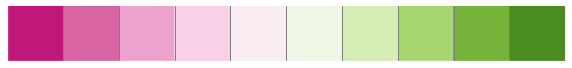

In [25]:
# @title Charts setup

sns.set_style("darkgrid", {'grid.color': '.5'})
param=sns.axes_style()
sns.palplot(sns.color_palette("PiYG", 10))
sns.despine()
#param

[Text(0.5, 1.0, 'Children with no parent in the labor force')]

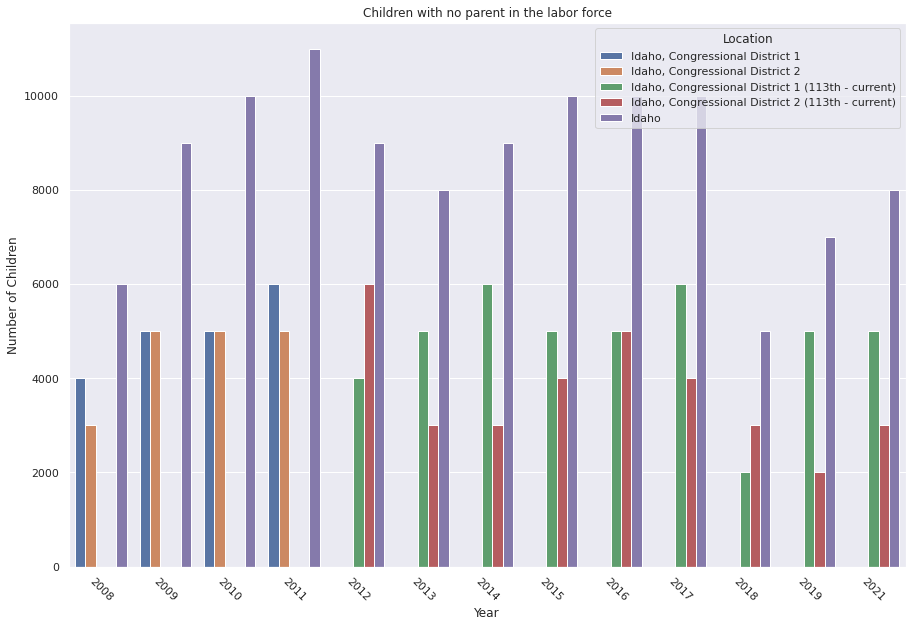

In [26]:
# @title Data Visualizations - Idaho

# Set chart size 
sns.set(rc = {'figure.figsize':(15,10)})

# plot data as bar chart
idaho_chart = sns.barplot(data=idaho2, y='Number', x='TimeFrame', hue='Location'
    ).set(title='Children with no parent in the labor force')
plt.xticks(rotation=-45)
plt.ylabel("Number of Children")
plt.xlabel("Year")

idaho_chart
 

In [86]:
# @title View All States Data Sample

# reading the databases
allstates = pd.read_csv("https://raw.githubusercontent.com/rus19023/drushlopez.github.io/master/allstates1.csv")
 
# Check for any null values
print(allstates.isnull().values.any())
allstates['Data'] = allstates['Data'].replace("N.A.", 0)
allstates.DataFormat = allstates.DataFormat.astype(str)
display(allstates.head())
display(allstates.tail())

allStates6 = data_preprocess2(allstates)

False


,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,2127000
1,Nation,United States,2000,Percent,0.1
2,Nation,United States,2001,Percent,0.09
3,Nation,United States,2002,Number,2121000
4,Nation,United States,2001,Number,2079000


,LocationType,Location,TimeFrame,DataFormat,Data
843,Territory,Puerto Rico,2004,Number,0
844,Territory,Puerto Rico,2006,Percent,0.25
845,Territory,Puerto Rico,2006,Number,73000
846,Territory,Puerto Rico,2007,Percent,0.26
847,Territory,Puerto Rico,2007,Number,71000


/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


In [87]:
allStates6


DataFormat,LocationType,Location,TimeFrame
0,City,District of Columbia,2000
1,City,District of Columbia,2001
2,City,District of Columbia,2002
3,City,District of Columbia,2003
4,City,District of Columbia,2004
...,...,...,...
419,Territory,Puerto Rico,2003
420,Territory,Puerto Rico,2004
421,Territory,Puerto Rico,2005
422,Territory,Puerto Rico,2006


In [76]:
allstates.DataFormat.describe

<bound method NDFrame.describe of 0      0       Number\n1      Percent\n2      Percent...
1      0       Number\n1      Percent\n2      Percent...
2      0       Number\n1      Percent\n2      Percent...
3      0       Number\n1      Percent\n2      Percent...
4      0       Number\n1      Percent\n2      Percent...
                             ...                        
843    0       Number\n1      Percent\n2      Percent...
844    0       Number\n1      Percent\n2      Percent...
845    0       Number\n1      Percent\n2      Percent...
846    0       Number\n1      Percent\n2      Percent...
847    0       Number\n1      Percent\n2      Percent...
Name: DataFormat, Length: 848, dtype: object>

In [34]:
allstates

,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,2127000
1,Nation,United States,2000,Percent,0.1
2,Nation,United States,2001,Percent,0.09
3,Nation,United States,2002,Number,2121000
4,Nation,United States,2001,Number,2079000
...,...,...,...,...,...
843,Territory,Puerto Rico,2004,Number,N.A.
844,Territory,Puerto Rico,2006,Percent,0.25
845,Territory,Puerto Rico,2006,Number,73000
846,Territory,Puerto Rico,2007,Percent,0.26


In [28]:
allStates6

DataFormat,LocationType,Location,TimeFrame
0,City,District of Columbia,2000
1,City,District of Columbia,2001
2,City,District of Columbia,2002
3,City,District of Columbia,2003
4,City,District of Columbia,2004
...,...,...,...
419,Territory,Puerto Rico,2003
420,Territory,Puerto Rico,2004
421,Territory,Puerto Rico,2005
422,Territory,Puerto Rico,2006


In [9]:
# @title Data Visualizations - All States

# plot data as bar graph
allstates_chart = sns.barplot(data=allstates, y='Location', x='TimeFrame', hue='Percent'
    ).set(title='Children with no parent in the labor force')
plt.xticks(rotation=-45)
plt.xlabel("Year")
plt.ylabel("Location")
sns.set(rc = {'figure.figsize':(20,40)})

allstates_chart

ValueError: ignored

In [ ]:
allstates.tail()

In [ ]:
allstates2 = data_preprocess(allstates)
allstates2.head()

In [ ]:


allstates2_chart = sns.barplot(data=allstates2, y='Number', x='TimeFrame', hue='Location'
    ).set(title='Children with no parent in the labor force')
plt.xticks(rotation=-45)
plt.ylabel("Number")
plt.xlabel("Year")

allstates2_chart